In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, f1_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
file_path = "data/seeds_dataset.csv"
raw_df = pd.read_csv(file_path, header=None)

In [5]:
raw_df.columns = [f"feature_{k}" for k in range(1, 8)] + ["target"]

In [6]:
raw_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [7]:
target_variable = raw_df["target"]
raw_df = raw_df.drop(columns=["target"])

data = MinMaxScaler([0, 1]).fit_transform(raw_df)

df = pd.DataFrame(data, columns=raw_df.columns)
df["target"] = target_variable

In [8]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,1
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,1
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,1
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,1
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,1
...,...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821,3
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306,3
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402,3
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493,3


In [9]:
train_data, val_data = train_test_split(df, test_size=0.2)

In [10]:
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_val, y_val = val_data.iloc[:, :-1], val_data.iloc[:, -1]

In [11]:
y_train

23     1
192    3
63     1
33     1
202    3
      ..
37     1
26     1
15     1
108    2
84     2
Name: target, Length: 168, dtype: int64

# Build Perceptron model


Perceptron with None penalty. F1_score: 0.8866061474757126
              precision    recall  f1-score   support

           1       0.94      0.79      0.86        19
           2       1.00      0.92      0.96        12
           3       0.73      1.00      0.85        11

    accuracy                           0.88        42
   macro avg       0.89      0.90      0.89        42
weighted avg       0.90      0.88      0.88        42

Perceptron with l1 penalty. F1_score: 0.7194327567399096
              precision    recall  f1-score   support

           1       0.38      0.86      0.52         7
           2       1.00      0.58      0.73        19
           3       0.93      0.88      0.90        16

    accuracy                           0.74        42
   macro avg       0.77      0.77      0.72        42
weighted avg       0.87      0.74      0.76        42

Perceptron with l2 penalty. F1_score: 0.8380108780108779
              precision    recall  f1-score   support

          

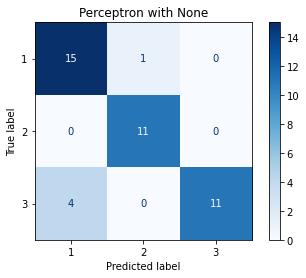

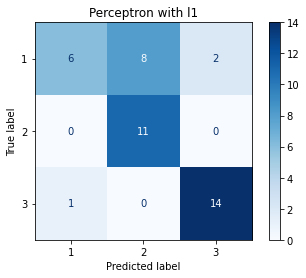

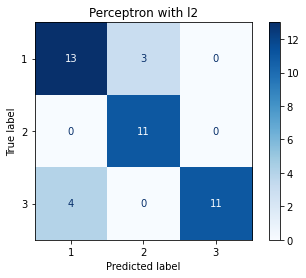

In [16]:
metric = f1_score

for penalty in [None, "l1", "l2"]:

    clf = Perceptron(random_state=42, penalty=penalty)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    metric_val = metric(y_pred, y_val, average="macro")
    
    print(f"Perceptron with {penalty} penalty. F1_score: {metric_val}")
    
    print(classification_report(y_pred, y_val))
    
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_val,
        y_val,
        cmap=plt.cm.Blues,
    )
    disp.ax_.set_title(f"Perceptron with {penalty}")


In [ ]:
# MLPModel

MLPClassifier with 0.005 lr and [128] layer architecture
F1_score: 0.9310269596384604


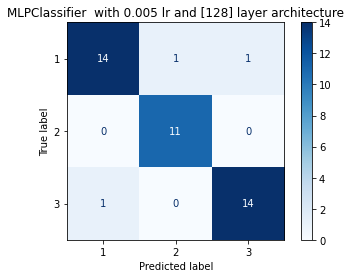

MLPClassifier with 0.005 lr and [256] layer architecture
F1_score: 0.9525323359825464


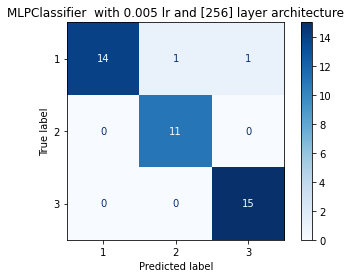

MLPClassifier with 0.005 lr and [128, 128] layer architecture
F1_score: 0.9525323359825464


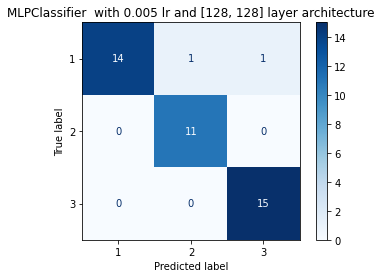

MLPClassifier with 0.005 lr and [128, 128, 128] layer architecture
F1_score: 0.9310269596384604


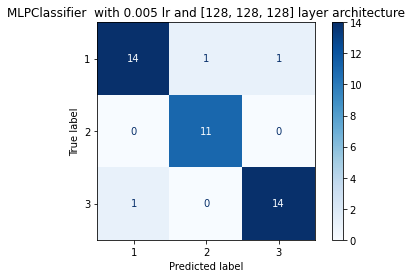

MLPClassifier with 0.001 lr and [128] layer architecture
F1_score: 0.8839760227413175


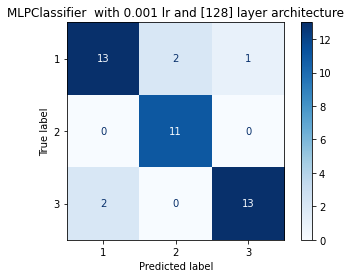

MLPClassifier with 0.001 lr and [256] layer architecture
F1_score: 0.9055555555555556


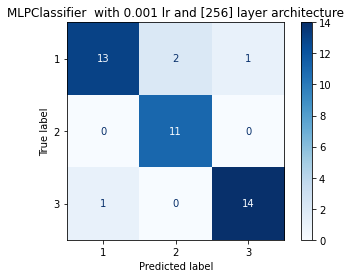

MLPClassifier with 0.001 lr and [128, 128] layer architecture
F1_score: 0.9525323359825464


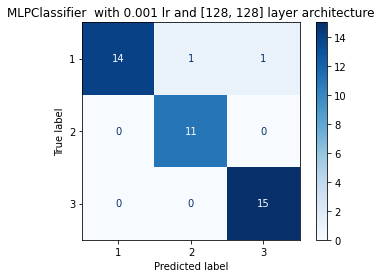

MLPClassifier with 0.001 lr and [128, 128, 128] layer architecture
F1_score: 0.9525323359825464


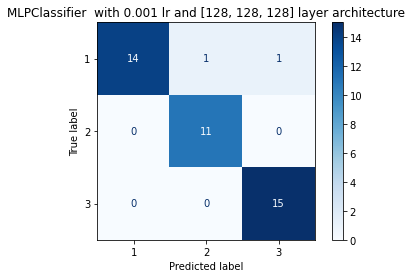

MLPClassifier with 0.0005 lr and [128] layer architecture
F1_score: 0.9067460317460316


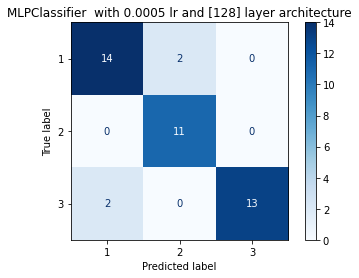

MLPClassifier with 0.0005 lr and [256] layer architecture
F1_score: 0.8839760227413175


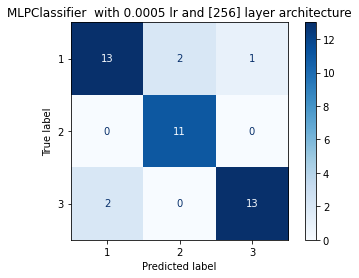

MLPClassifier with 0.0005 lr and [128, 128] layer architecture
F1_score: 0.9310269596384604


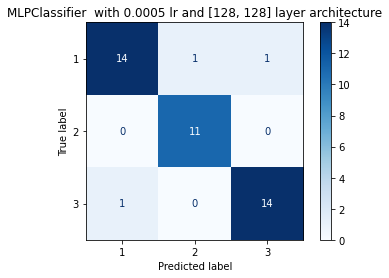

MLPClassifier with 0.0005 lr and [128, 128, 128] layer architecture
F1_score: 0.9525323359825464


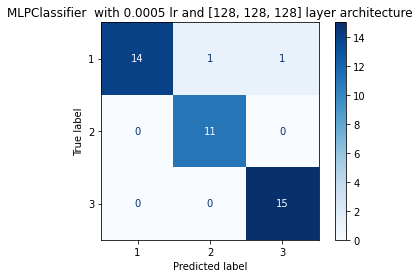

MLPClassifier with 0.0001 lr and [128] layer architecture
F1_score: 0.7590964590964591


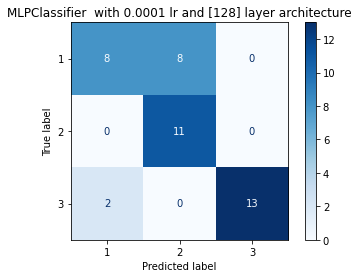

MLPClassifier with 0.0001 lr and [256] layer architecture
F1_score: 0.8123456790123457


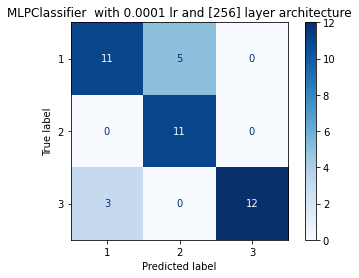

MLPClassifier with 0.0001 lr and [128, 128] layer architecture
F1_score: 0.9067460317460316


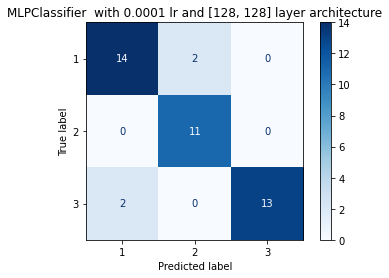

MLPClassifier with 0.0001 lr and [128, 128, 128] layer architecture
F1_score: 0.8839760227413175


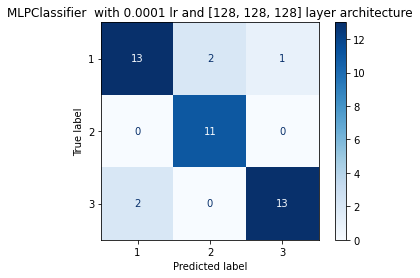

In [47]:
learning_rates = [0.005, 0.001, 0.0005, 0.0001]
hidden_layer_sizes = [[128], [256], [128, 128], [128, 128, 128]]
max_iter = 500

trained_models = []
for lr in learning_rates:
    for hidden_layers in hidden_layer_sizes:
        
        clf = MLPClassifier(learning_rate_init=lr, hidden_layer_sizes=hidden_layers, max_iter=max_iter, tol=0.001)
        
        train_scores = []
        val_scores = []
        for i in range(max_iter):
            clf.partial_fit(X_train, y_train, np.unique(y_train))
            
            y_pred_train = clf.predict(X_train)
            metric_train = metric(y_pred_train, y_train, average="macro")
            train_scores.append(metric_train)
            
            y_pred_val = clf.predict(X_val)
            metric_val = metric(y_pred_val, y_val, average="macro")
            val_scores.append(metric_val)
            

        y_pred = clf.predict(X_val)
        metric_val = metric(y_pred, y_val, average="macro")

        print(f"MLPClassifier with {lr} lr and {hidden_layers} layer architecture")
        print(f"F1_score: {metric_val}")

        # print(classification_report(y_pred, y_val))

        disp = ConfusionMatrixDisplay.from_estimator(
            clf,
            X_val,
            y_val,
            cmap=plt.cm.Blues,
        )
        disp.ax_.set_title(f"MLPClassifier  with {lr} lr and {hidden_layers} layer architecture")
        plt.show()
        
        trained_models.append((lr, hidden_layers, clf, train_scores, val_scores ))
        

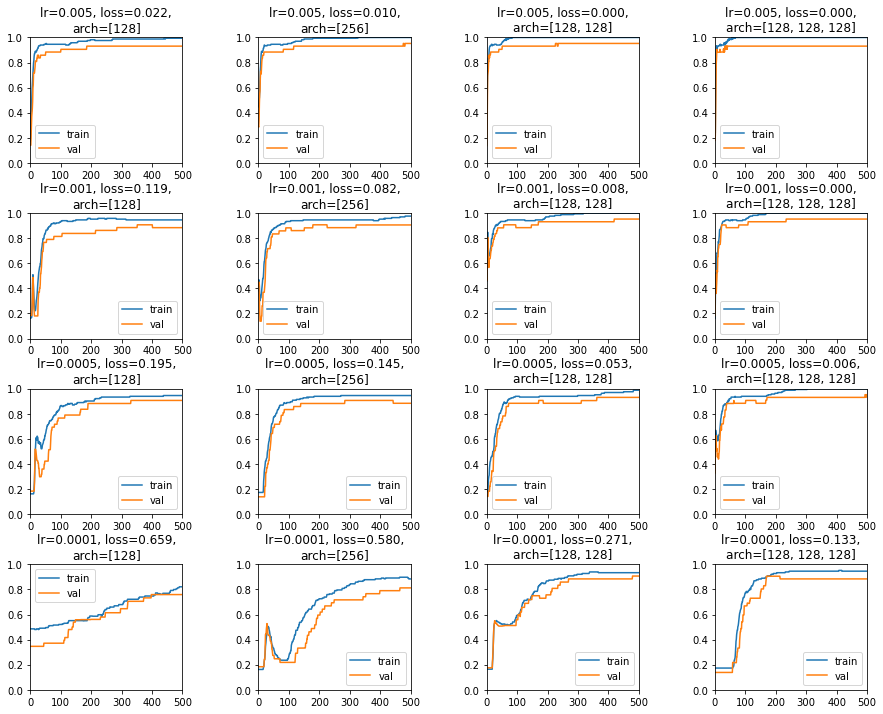

In [60]:
fig, axes = plt.subplots(4, 4, figsize=(15, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.4)

# plt.xlabel("num of iter")
# plt.ylabel("f1_score")

for ax, (lr, hidden_layers, clf, train_scores, val_scores) in zip(axes.ravel(), trained_models):
#     ax.plot(clf.loss_curve_)
    ax.plot(train_scores)
    ax.plot(val_scores)
    ax.set_xlim(0, max_iter)
    ax.set_ylim(0, 1.0)
    ax.legend(labels=["train", "val"])
    loss = "{:0.3f}".format(clf.loss_)
    ax.title.set_text(f"lr={lr}, loss={loss},\narch={hidden_layers}")
   